In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from SSIA.utils import mapping, parameter_range
from scipy import stats
import math

In [2]:
df = pd.read_csv("analysis/not_uploaded/parsed/SSIA_mobilenet_test_scores_TID2013.csv")
mos = pd.read_csv("analysis/not_uploaded/mos_with_names.txt", sep=" ")

df = df[df["img"].str.contains("_")]
df["img"] = df["img"].apply(lambda row: row.lower())
df["img"] = df["img"].apply(lambda row: row.split(".")[0])
df["img"] = df["img"].apply(lambda row: row if "_" in row else row+"_00_0")

mos["img"] = mos["img"].apply(lambda row: row.lower())
mos["img"] = mos["img"].apply(lambda row: row.split(".")[0])
mos["img"] = mos["img"].apply(lambda row: row if "_" in row else row+"_00_0")


df = df.set_index("img").join(mos.set_index("img"))
df = pd.DataFrame(df.to_records())

df["img_id"] = df["img"].apply(lambda row: int(row.split("_")[0][1:]))
df["distortion"] = df["img"].apply(lambda row: int(row.split("_")[1]))
df["dist_level"] = df["img"].apply(lambda row: int(row.split("_")[2]))


df["score"] = (df["styles_score"] + df["technical_score"] + df["composition_score"])/3

df

,img,styles_score,technical_score,composition_score,score,MOSscore,img_id,distortion,dist_level
0,i01_01_1,0.5480,0.7240,0.4090,0.560333,5.51429,1,1,1
1,i01_01_2,0.5230,0.7130,0.3728,0.536267,5.56757,1,1,2
2,i01_01_3,0.5513,0.7207,0.4192,0.563733,4.94444,1,1,3
3,i01_01_4,0.5290,0.7420,0.4412,0.570733,4.37838,1,1,4
4,i01_01_5,0.4944,0.7180,0.4233,0.545233,3.86486,1,1,5
...,...,...,...,...,...,...,...,...,...
2995,i25_24_1,0.4230,0.9336,0.3370,0.564533,5.65714,25,24,1
2996,i25_24_2,0.4307,0.9453,0.3508,0.575600,5.44444,25,24,2
2997,i25_24_3,0.4120,0.9497,0.3306,0.564100,4.62857,25,24,3
2998,i25_24_4,0.3494,0.9316,0.2329,0.504633,4.02778,25,24,4


In [3]:
def histogram_distortion(distortion:int, score:str):
    plot_frame = df[(df["distortion"] == distortion) | (df["distortion"] == 0)]
    for dist_level in range(6):
        sns.distplot(plot_frame[(plot_frame["dist_level"] == dist_level)][score], label=f"{distortion}: {dist_level}")
    plt.legend()

In [4]:
def violin_distortion(distortion:int, score:str):
    plot_frame = df[(df["distortion"] == distortion) | (df["distortion"] == 0)]
    sns.violinplot(data=plot_frame, x="dist_level", y=score, color="steelblue")
    plt.legend()

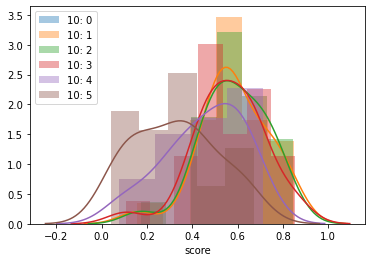

In [5]:
histogram_distortion(10, "score")

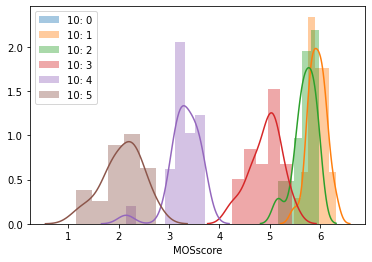

In [6]:
histogram_distortion(10, "MOSscore")

No handles with labels found to put in legend.


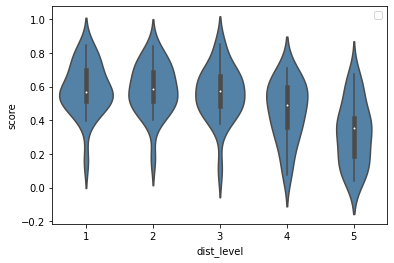

In [10]:
violin_distortion(10, "score")

No handles with labels found to put in legend.


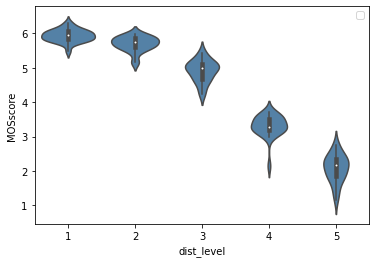

In [8]:
violin_distortion(10, "MOSscore")

In [9]:
for dist in range(1, 25):
    results = []
    for img in range(1,26):
        results.append(stats.spearmanr(df[(df["img_id"] == img) & (df["distortion"] == dist)]["dist_level"], df[(df["img_id"] == img) & (df["distortion"] == dist)]["score"]))
    print(dist,"\t", sum([val[0] for val in results])/25)

1 	 -0.4159999999999999
2 	 -0.2940519567041703
3 	 -0.4520000000000001
4 	 -0.572
5 	 -0.4839999999999998
6 	 -0.484
7 	 -0.46399999999999997
8 	 -0.348
9 	 -0.548
10 	 -0.7879999999999998
11 	 -0.45599999999999996
12 	 -0.2919999999999999
13 	 -0.42399999999999993
14 	 -0.4779480432958297
15 	 0.30399999999999994
16 	 -0.25999999999999984
17 	 -0.264
18 	 -0.196
19 	 -0.40800000000000003
20 	 -0.52
21 	 -0.496
22 	 -0.43599999999999994
23 	 -0.288
24 	 -0.6039999999999999


In [11]:
for dist in range(1, 25):
    results = []
    for img in range(1,26):
        results.append(stats.spearmanr(df[(df["img_id"] == img) & (df["distortion"] == dist)]["dist_level"], df[(df["img_id"] == img) & (df["distortion"] == dist)]["MOSscore"]))
    print(dist,"\t", sum([val[0] for val in results])/25)

1 	 -0.9839999999999999
2 	 -0.9359999999999999
3 	 -0.9999999999999999
4 	 -0.9408313072667248
5 	 -0.9719999999999999
6 	 -0.996
7 	 -0.9959999999999998
8 	 -0.996
9 	 -0.9829871773792357
10 	 -0.9999999999999999
11 	 -0.9949871773792357
12 	 -0.8959999999999998
13 	 -0.9159999999999998
14 	 -0.8778704413501309
15 	 0.7728313072667247
16 	 -0.8719999999999999
17 	 -0.49467543715421414
18 	 -0.9639999999999997
19 	 -0.9829871773792358
20 	 -0.9399999999999997
21 	 -0.9959999999999998
22 	 -0.9919999999999999
23 	 -0.9179743547584716
24 	 -0.996


In [12]:
for dist in range(1, 25):
    results = []
    for img in range(1,26):
        results.append(stats.spearmanr(df[(df["img_id"] == img) & (df["distortion"] == dist)]["MOSscore"], df[(df["img_id"] == img) & (df["distortion"] == dist)]["score"]))
    print(dist,"\t", sum([val[0] for val in results])/25)

1 	 0.39999999999999986
2 	 0.24605195670417024
3 	 0.4520000000000001
4 	 0.5446234804500437
5 	 0.45599999999999996
6 	 0.48
7 	 0.46
8 	 0.352
9 	 0.5389871773792358
10 	 0.7879999999999998
11 	 0.46267543715421405
12 	 0.26399999999999996
13 	 0.41999999999999993
14 	 0.49210391340834064
15 	 0.15498717737923579
16 	 0.352
17 	 0.33498717737923583
18 	 0.19599999999999998
19 	 0.4208313072667249
20 	 0.484
21 	 0.5
22 	 0.44800000000000006
23 	 0.26870108239574225
24 	 0.6


In [13]:
stats.spearmanr(df["MOSscore"], df["score"])

SpearmanrResult(correlation=0.2265315403757288, pvalue=3.240379617046448e-36)